In [1]:
import numpy as np
import pandas as pd
import gymnasium as gym
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Custom modules
from agent import QAgent, QLambdaAgent


SEED = 42

np.random.seed(SEED)

In [2]:
# env = gym.make('FrozenLake-v1', render_mode='human')
env = gym.make('FrozenLake-v1', is_slippery=False, map_name='4x4')
agent = QLambdaAgent(
    env=env,
    discount_factor=0.995,
    initial_epsilon=1,
    epsilon_decay=0.999,
    min_epsilon=0.0,
    learning_rate=0.9,
    seed=SEED,
    trace_decay=0.9
)


In [ ]:
rewards = agent.learn(2000)

100%|██████████| 3000/3000 [00:01<00:00, 2996.00it/s]


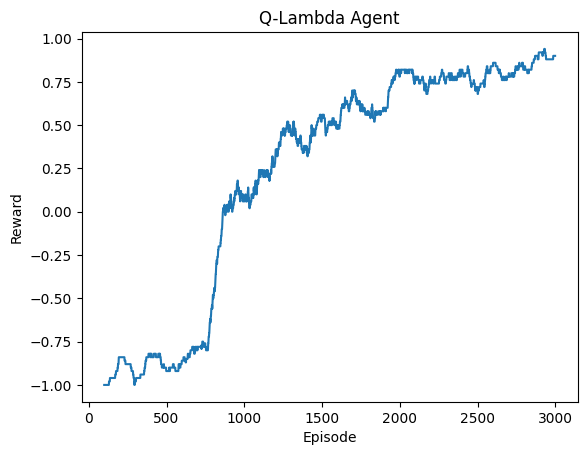

In [4]:
rewards = pd.Series(rewards)
fig, ax = plt.subplots()
ax.plot(rewards.rolling(100).mean())
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.set_title('Q-Lambda Agent')
plt.show()

In [5]:
env.close()